In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

import random

In [66]:
tipos = 2
values = []
train_values = []
train_labels = []

test_values = []
test_labels = []

# Calcula el tamaño del conjunto de prueba (20%)
test_size = int(len(values) * 0.2)

for i in range(0, tipos):
    with open("tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w, x, y, z, etiqueta = map(float, line.strip().split(','))
            dato = [w, x, y, z, etiqueta]



    train_values.append(dato)
    train_labels.append(int(etiqueta))

        

In [ ]:
# Mezcla aleatoriamente los índices de los datos de entrenamiento
indices = list(range(len(train_values)))
random.shuffle(indices)

# Selecciona los primeros test_size índices para el conjunto de prueba
test_indices = indices[:test_size]

# Resto de los índices para el conjunto de entrenamiento
train_indices = indices[test_size:]

# Construye los conjuntos de entrenamiento y prueba
test_values = [train_values[i] for i in test_indices]
test_labels = [train_labels[i] for i in test_indices]
train_values = [train_values[i] for i in train_indices]
train_labels = [train_labels[i] for i in train_indices]


In [65]:
print("train_values")
print(train_values[:1])
print("labels_values")
print(train_labels[:5])
print(train_labels[995:])
print(len(train_values))
print(len(train_labels))

train_values
[[0.99438477, -0.10406494, 0.01849365, -0.00067139]]
labels_values
[0, 0, 0, 0, 0]
[]
500
500


In [63]:
labels_one_hot = to_categorical(train_labels)
print(labels_one_hot[:1])
print(labels_one_hot[999:])

[[1. 0.]]
[[0. 1.]]


In [56]:
# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(4,), activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=15, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

32/32 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.8100
Loss: 0.4951483905315399, Accuracy: 0.8100000023841858


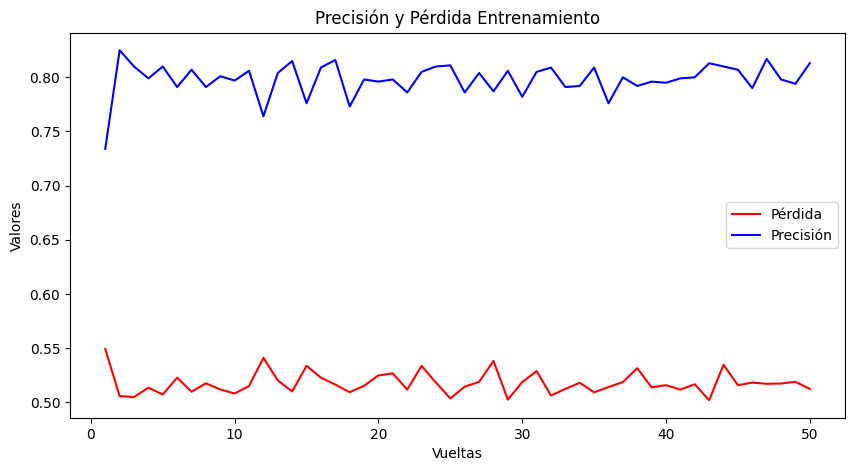

In [57]:
loss = history.history['loss']
accuracy = history.history['accuracy']

# Crear el gráfico
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5)), plt.plot(epochs, loss, 'r', label='Pérdida'), plt.plot(epochs, accuracy, 'b', label='Precisión')
plt.title('Precisión y Pérdida Entrenamiento')
plt.xlabel('Vueltas'), plt.ylabel('Valores'), plt.legend()
plt.show()